In [2]:
from datetime import date

# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np
import sidetable
# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import levene
import researchpy as rp
from scipy import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=None


In [3]:
df_original = pd.read_csv('/mnt/c/Users/antoa/Desktop/ADALAB/copias proyecto/bikes_limpio2.csv', index_col=0)
df_original.head(2)

,index,date,season,year,month,holiday,weeakday,weathersit,sensation,humidity,windspeed,casual,registered,count
0,1,2018-01-01,winter,0,1,1,1,2,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,2,17.68695,69.6087,16.652113,131,670,801


In [4]:
df=df_original.copy()
df.reset_index(drop=True, inplace=True)
df.head(2)

,index,date,season,year,month,holiday,weeakday,weathersit,sensation,humidity,windspeed,casual,registered,count
0,1,2018-01-01,winter,0,1,1,1,2,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,2,17.68695,69.6087,16.652113,131,670,801


In [5]:
df.drop(["date","index","casual"], axis=1, inplace=True)
df.head(2)

,season,year,month,holiday,weeakday,weathersit,sensation,humidity,windspeed,registered,count
0,winter,0,1,1,1,2,18.18125,80.5833,10.749882,654,985
1,winter,0,1,0,2,2,17.68695,69.6087,16.652113,670,801


### Variables predictoras

#### Variables numericas

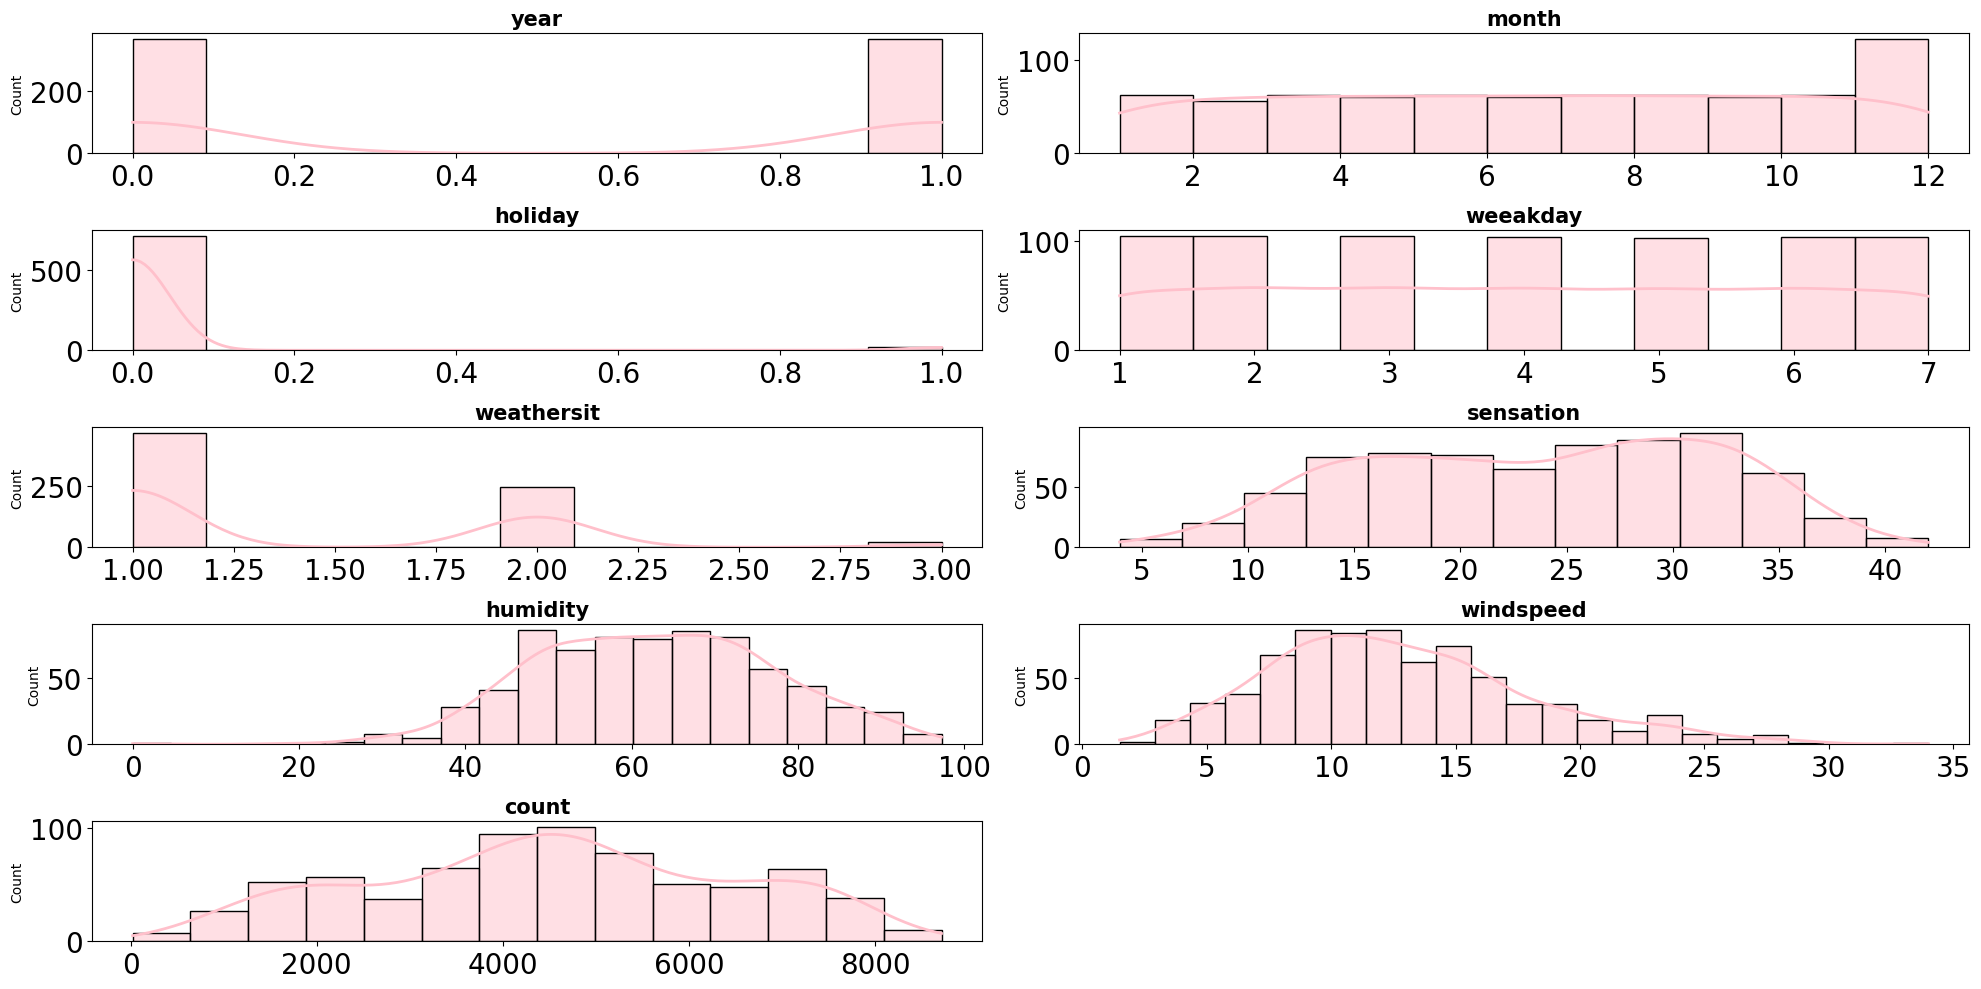

In [6]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = [np.number, "category"]).columns
columnas_numeric = columnas_numeric.drop(["registered"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])

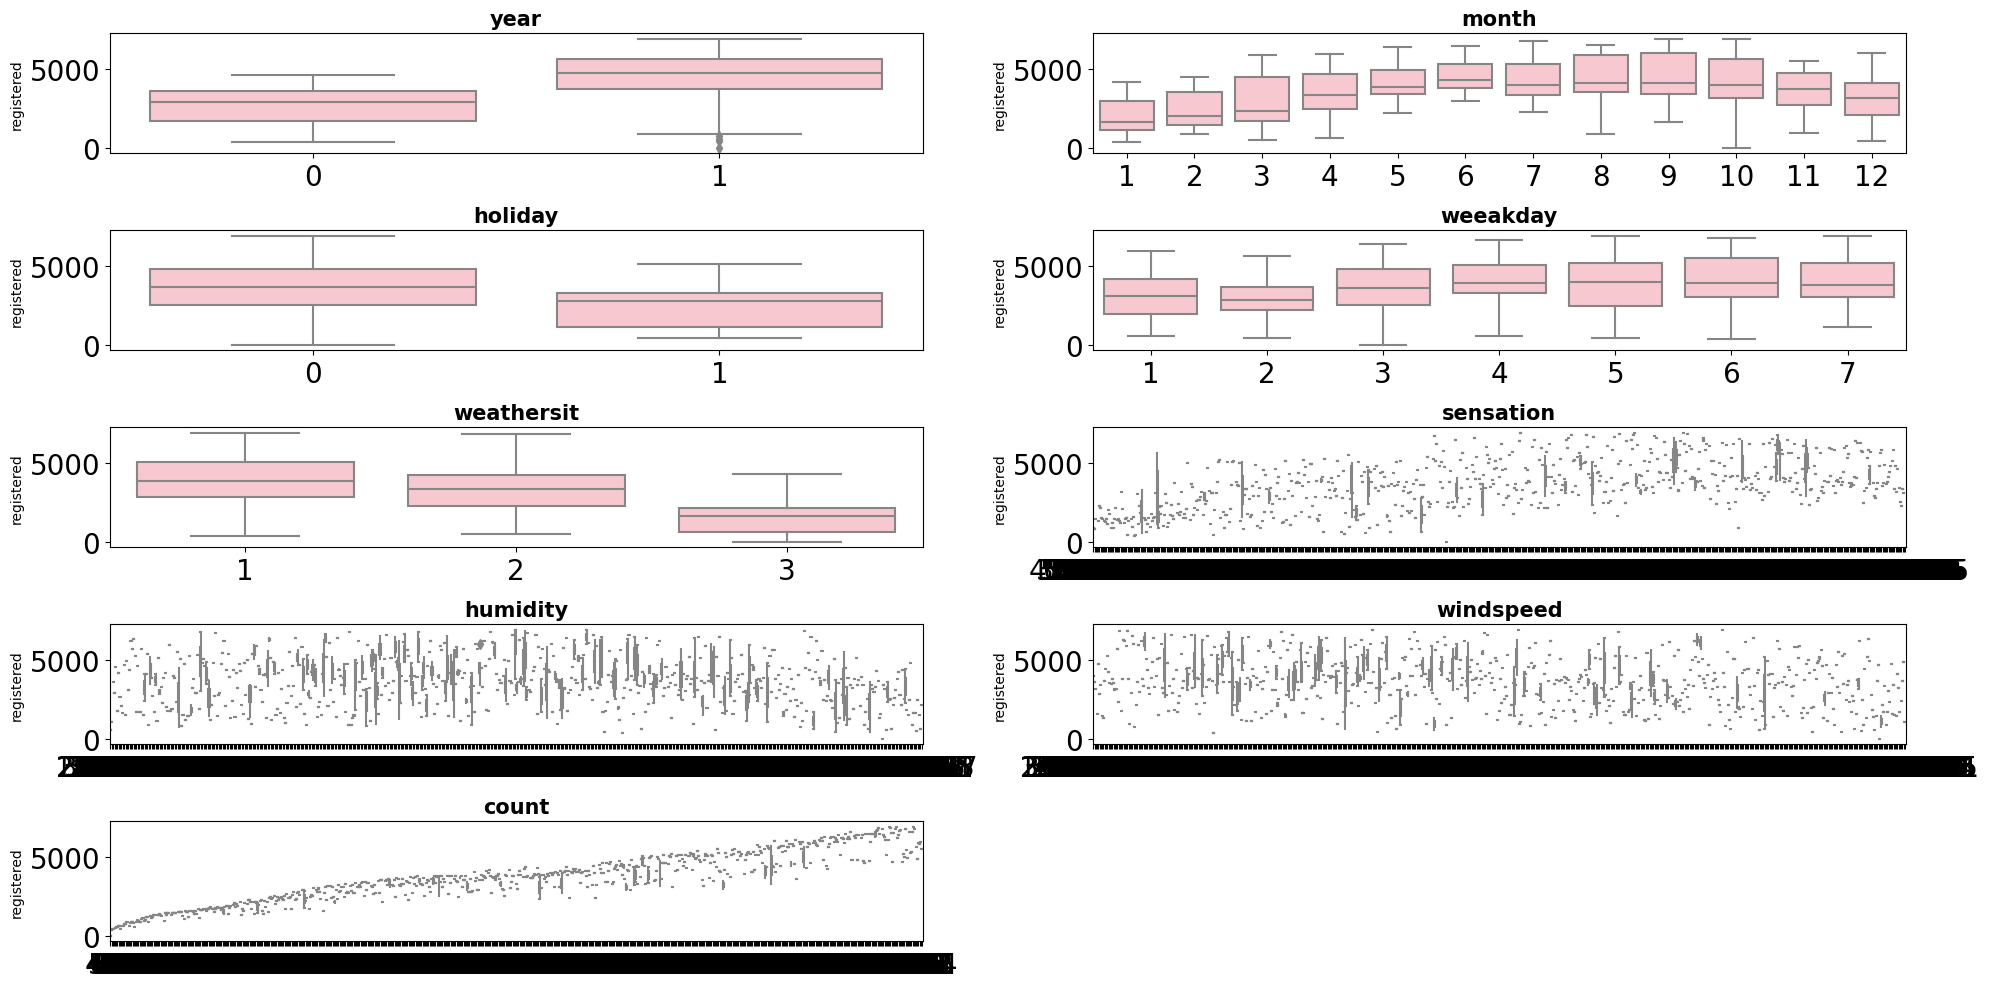

In [7]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = [np.number, "category"]).columns
columnas_numeric = columnas_numeric.drop(["registered"])

for i, colum in enumerate(columnas_numeric): 
    sns.boxplot(
        data = df,
        y = "registered",
        x=colum,
        color = "pink", 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])

<AxesSubplot:xlabel='weathersit', ylabel='registered'>

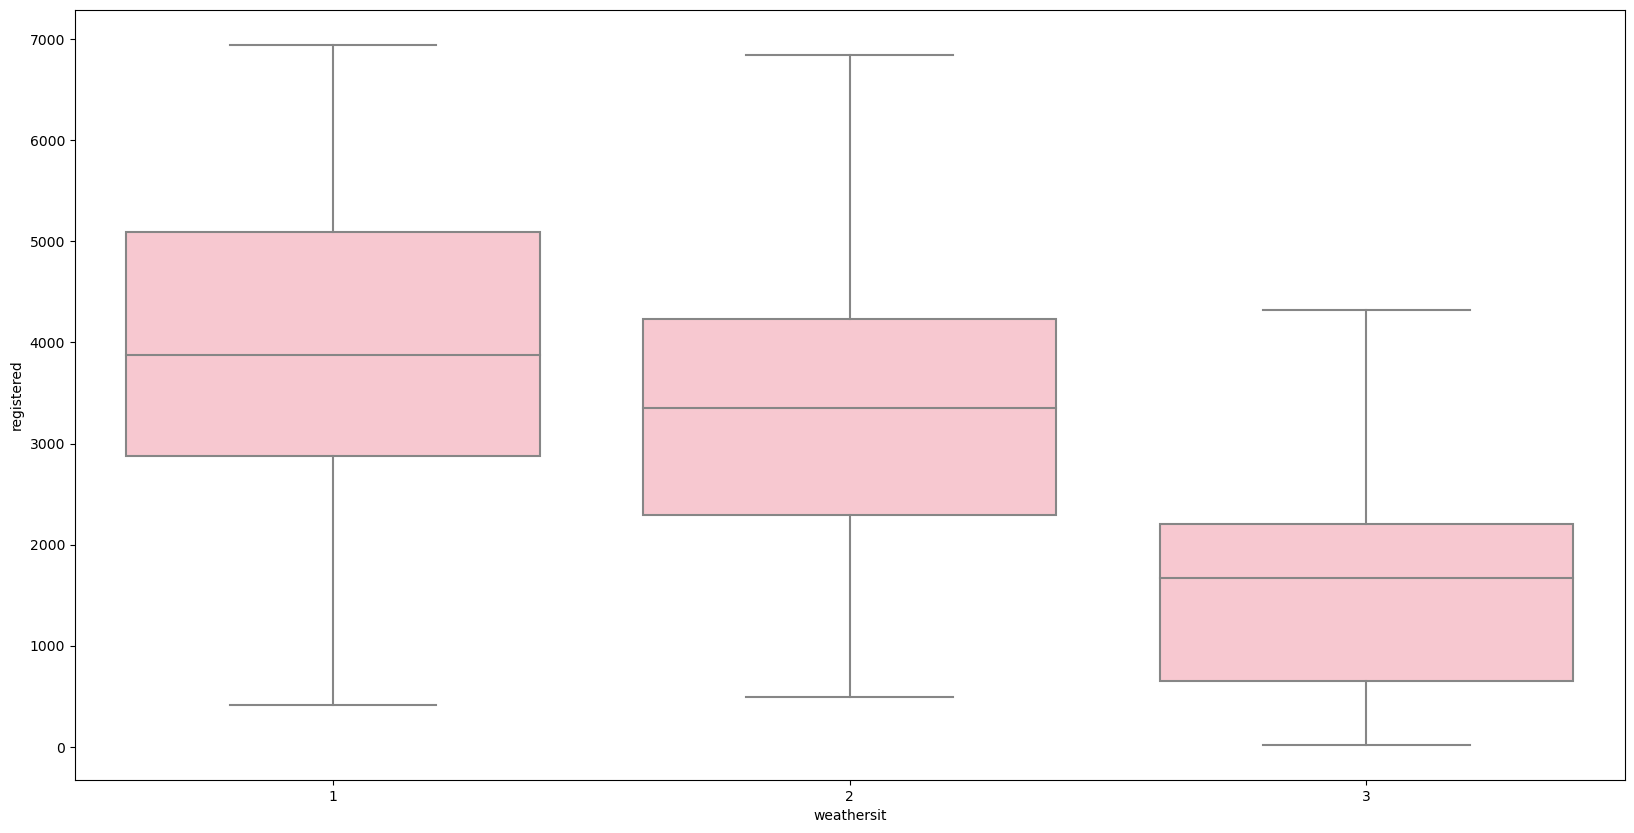

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="weathersit",
        color = "pink")

<AxesSubplot:xlabel='weeakday', ylabel='registered'>

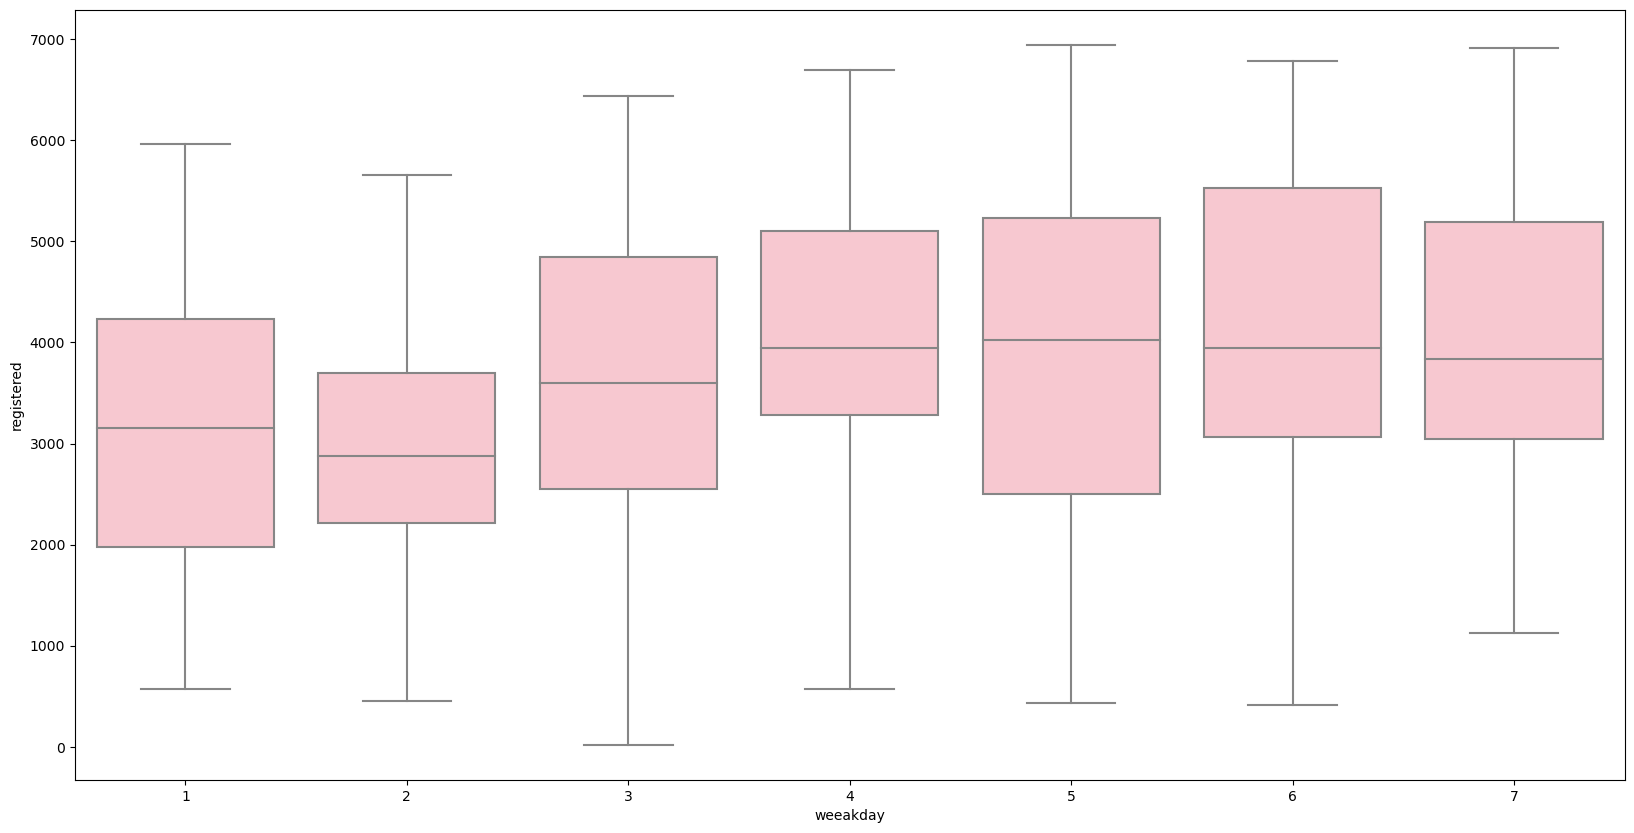

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="weeakday",
        color = "pink")

<AxesSubplot:xlabel='month', ylabel='registered'>

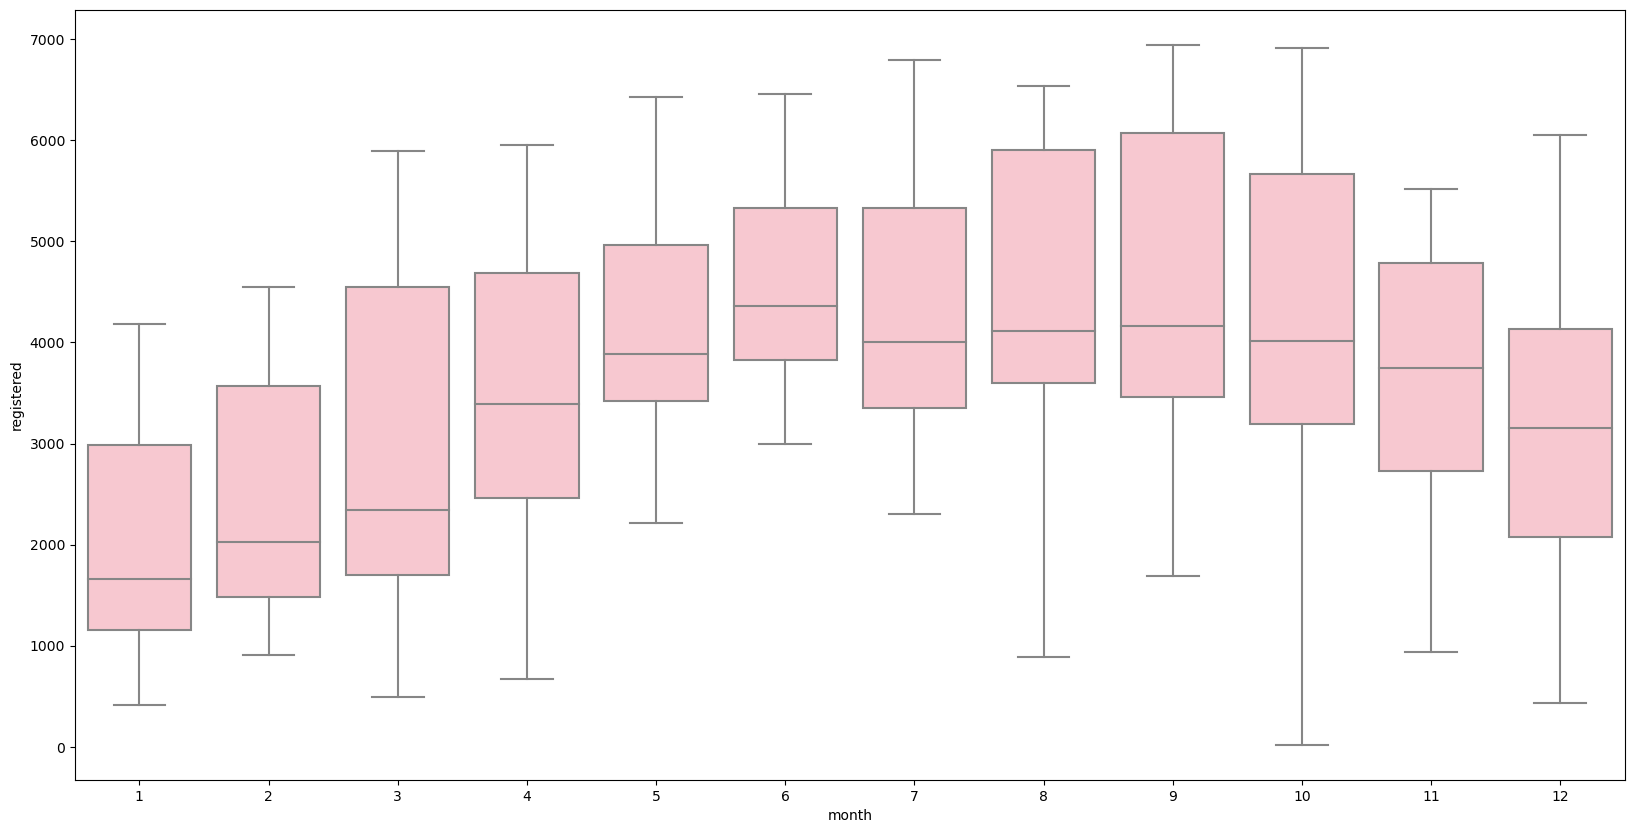

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot( 
        data = df,
        y = "registered",
        x="month",
        color = "pink")

#### Correlación entre variables numéricas

In [12]:
numericas=df.select_dtypes(include = np.number).drop(["registered"], axis=1)
numericas.head()

,year,month,holiday,weeakday,weathersit,sensation,humidity,windspeed,count
0,0,1,1,1,2,18.18125,80.5833,10.749882,985
1,0,1,0,2,2,17.68695,69.6087,16.652113,801
2,0,1,0,3,1,9.47025,43.7273,16.636703,1349
3,0,1,0,4,1,10.60610,59.0435,10.739832,1562
4,0,1,0,5,1,11.46350,43.6957,12.522300,1600


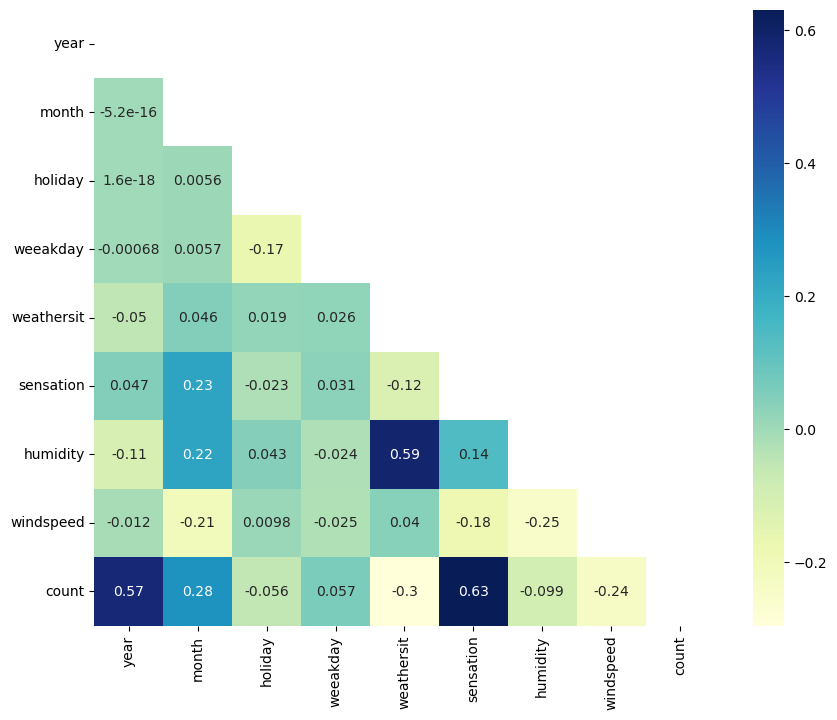

In [13]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool))

sns.heatmap(numericas.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
            #v_min=-1,
            #v_max=1,
           annot = True);

# Estandarización

In [14]:
# iniciamos el método para escalar
#scaler = StandardScaler()
# Eliminamos las columnas númericas que no queremos estandarizar
numericas.drop(["weeakday", "weathersit","month","holiday","year"], axis = 1, inplace = True)
numericas.head(2)

,sensation,humidity,windspeed,count
0,18.18125,80.5833,10.749882,985
1,17.68695,69.6087,16.652113,801


In [15]:
# iniciamos el método para escalar
scaler = StandardScaler()

# ajustamos nuestros datos.  
scaler.fit(numericas)

# transformamos los datos
X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,sensation,humidity,windspeed,count
0,-0.680818,1.252343,-0.387833,-1.820972
1,-0.741507,0.480996,0.748899,-1.916078


In [16]:
df[numericas_estandar.columns] = numericas_estandar
df.head()

,season,year,month,holiday,weeakday,weathersit,sensation,humidity,windspeed,registered,count
0,winter,0,1,1,1,2,-0.680818,1.252343,-0.387833,654,-1.820972
1,winter,0,1,0,2,2,-0.741507,0.480996,0.748899,670,-1.916078
2,winter,0,1,0,3,1,-1.750344,-1.338073,0.745931,1229,-1.632827
3,winter,0,1,0,4,1,-1.610886,-0.261577,-0.389769,1454,-1.522732
4,winter,0,1,0,5,1,-1.505615,-1.340294,-0.046477,1518,-1.503090


In [17]:
df.to_csv('registes_eda.csv')